In [1]:
# make a graph of the results in results_3.json
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd

with open("results_3.json", "r") as f:
    results = json.load(f)

print(results)

{'who is the leader': {'5': {'response': 'The leader is 127.0.0.1:1025.', 'matched_logs': ['127.0.0.1:1025 Became follower', '127.0.0.1:1026 Became follower', '127.0.0.1:1027 Became follower', '127.0.0.1:1025 Won election, became leader in term 1', '127.0.0.1:1027 Voted for 127.0.0.1:1025 whose term is 1'], 'cost': 0.00025}, '10': {'response': 'Answer: The leader is 127.0.0.1:1025.', 'matched_logs': ['127.0.0.1:1025 Became follower', '127.0.0.1:1026 Became follower', '127.0.0.1:1027 Became follower', '127.0.0.1:1025 Committing changes to persistent storage. State is now: Term: 1, Commit log index: -1, Last applied log index: -1, Last voted for: self, ', '127.0.0.1:1025 Won election, became leader in term 1', '127.0.0.1:1026 Voted for 127.0.0.1:1025 whose term is 1', '127.0.0.1:1027 Voted for 127.0.0.1:1025 whose term is 1', '127.0.0.1:1025 Committing changes to persistent storage. State is now: Term: 1, Commit log index: 2, Last applied log index: 1, Last voted for: self, ', '127.0.0.1

In [10]:
# print all responses for each query
for query in results:
    print("--------------------")
    print("QUERY: " + query)
    for k in results[query]:
        print("K: " + str(k))
        print(results[query][k]["response"])
        print("---")

--------------------
QUERY: who is the leader
K: 5
The leader is 127.0.0.1:1025.
---
K: 10
Answer: The leader is 127.0.0.1:1025.
---
K: 20
Answer: The leader is 127.0.0.1:1025.
---
K: 50
There is no information in the logs about who the leader is.
---
K: 100
There is no answer to the query "who is the leader" in the given logs. The logs only contain information about the initialization of servers, errors, committing changes to persistent storage, becoming a follower, sending request votes, winning elections, appending log entries, and applying log entries to the state machine.
---
--------------------
QUERY: what servers were initialized
K: 5
Answer: The servers that were initialized are 127.0.0.1:1025, 127.0.0.1:1026, and 127.0.0.1:1027.
---
K: 10
Servers that were initialized are:
- 127.0.0.1:1025
- 127.0.0.1:1026
- 127.0.0.1:1027
---
K: 20
Servers that were initialized are:
- 127.0.0.1:1025
- 127.0.0.1:1026
- 127.0.0.1:1027
---
K: 50
Servers that were initialized are: 
- 127.0.0.1:1

In [11]:
# correct or not 
correct = {
    "who is the leader": [1,1,1,0,0],
    "what servers were initialized": [1,1,1,1,1],
    "who are the current followers": [0,1,0,0,0],
    "what server has crashed": [0,0,0,0,0],
    "describe the last election": [1,1,1,1,0]
}

{'who is the leader': 0.6, 'what servers were initialized': 1.0, 'who are the current followers': 0.2, 'what server has crashed': 0.0, 'describe the last election': 0.8}


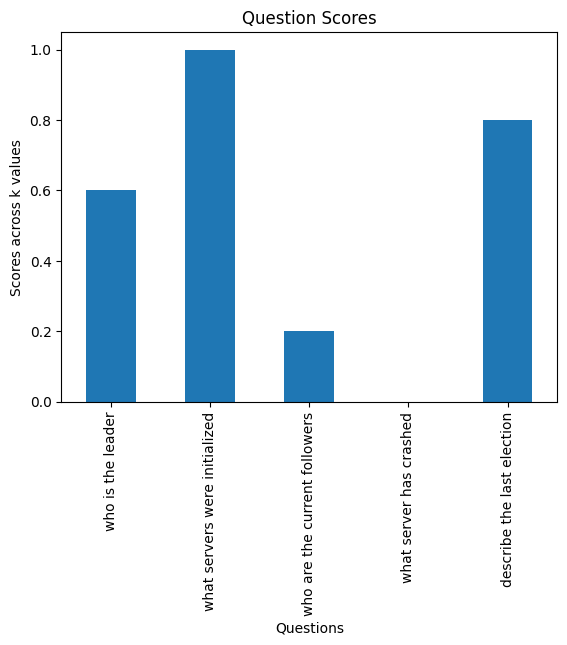

In [16]:
# accuracy for each query
accuracies = {}
for query in results:
    accuracies[query] = {}
    for k in results[query]:
        accuracies[query] = np.mean(correct[query])

print(accuracies)


series = pd.Series(accuracies)

series.plot(kind='bar')
plt.xlabel('Questions')
plt.ylabel('Scores across k values')
plt.title('Question Scores')
plt.show()

{5: 0.6, 10: 0.8, 20: 0.6, 50: 0.4, 100: 0.2}


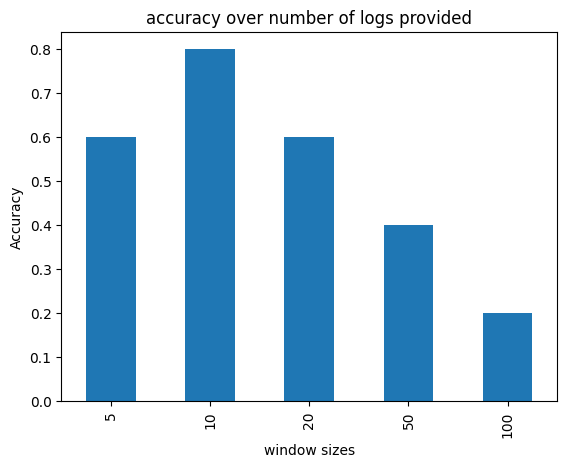

In [29]:
# accuracy for each query
accuracies = {}
for i, k in enumerate([5, 10, 20, 50, 100]):
    accuracies[k] = 0
    for query in correct:
        accuracies[k] += correct[query][i]
    accuracies[k] /= len(results)

print(accuracies)


series = pd.Series(accuracies)

series.plot(kind='bar')
plt.xlabel('window sizes')
plt.ylabel('Accuracy')
plt.title('accuracy over number of logs provided')
plt.show()